# TimeMixer: 또 하나의 Multiscale mixer deep learning model

medium 링크: https://towardsdatascience.com/timemixer-exploring-the-latest-model-in-time-series-forecasting-056d9c883f46?sk=v2%2F11cdfab3-b80d-4fe6-82d5-14cb453c65cc  
원문 논문: https://arxiv.org/abs/2405.14616

- 딥러닝 모델이 사용되는 이유: large dataset, many features

# Discover TimeMixer

- Multiscale을 사용하는 이유: 시계열 데이터는 시간 단위 별로 다른 정보, 특징을 갖고 있다.

- 큰 시간 단위가 더 전반적인 추세를 포착하고
- 작은 시간 단위는 더 세부적인 변동까지 표현한다.

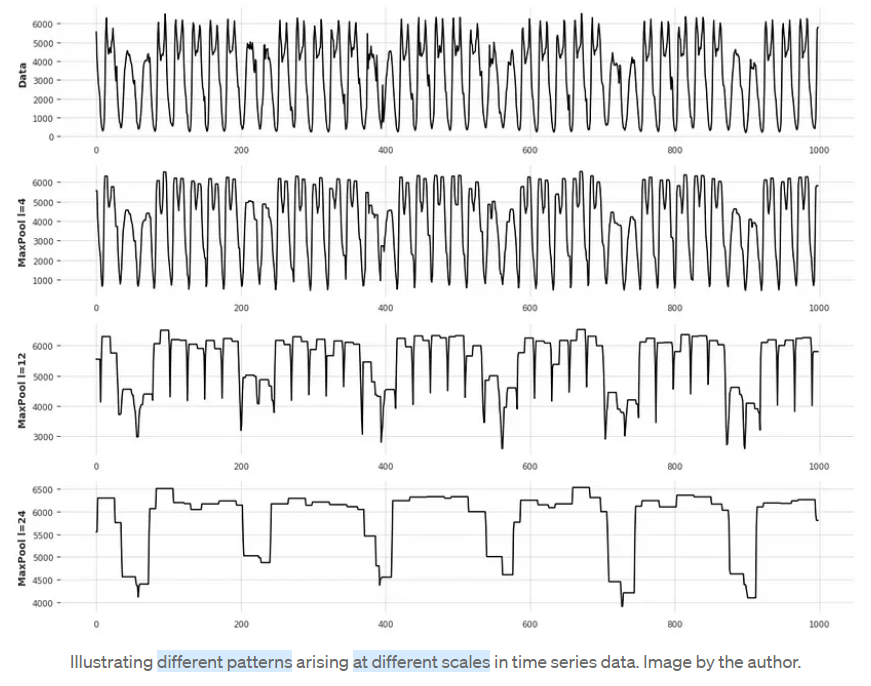

# Architecture of TimeMixer 개요

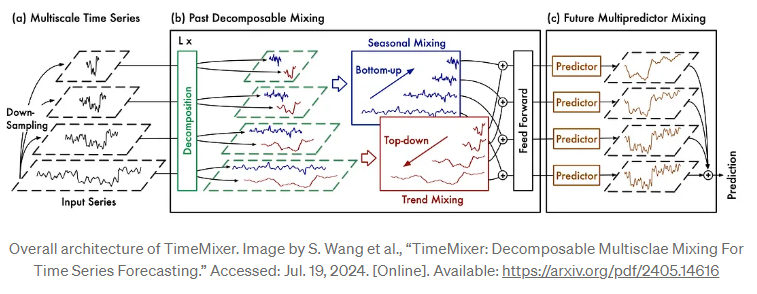

## 전반적 프로세스

1. input samples가 average pooling으로 downsampling 된다.
- Maxpooling을 사용하는 것으로 소개된 NHiTS와 대조적이다.

2. Past-Decomposable-Mixing(PDM) block을 통과한다.
- trend와 seasonality를 명시하고, 이를 서로 다른 과정으로 처리한다!
- NHiTS도 이것을 해석가능성을 위해 명시하고 처리하는 것이 가능은 했지만, feature capture을 덜하는 등 모델의 성능을 희생해야 했다.

3. Future-Multipredictor-Mixing(FMM) block을 통과한다
- 각 시간 단위별로 예측을 수행하고 이를 최종 예측에 사용한다.
- NHiTS와 유사하다

## 1. Past Decomposable Mixing (PDM)

- PDM으로 오기 전 먼저 Average Pooling으로 서로 다른 시간 단위의 데이터로 가공(down sampling)한다.

- Down sampling을 하더라도 각 샘플데이터가 서로 다른 trend와 seasonality를 간직하고 있다

- trend: 시계열 전체에 걸친 추세
- seasonality: 시계열 내에서 주기적으로 반복되는 변화

- average pooling을 수행하는 이유: average 적용 정도에 따라 더 장기적인 추세를 파악할 수 있다.

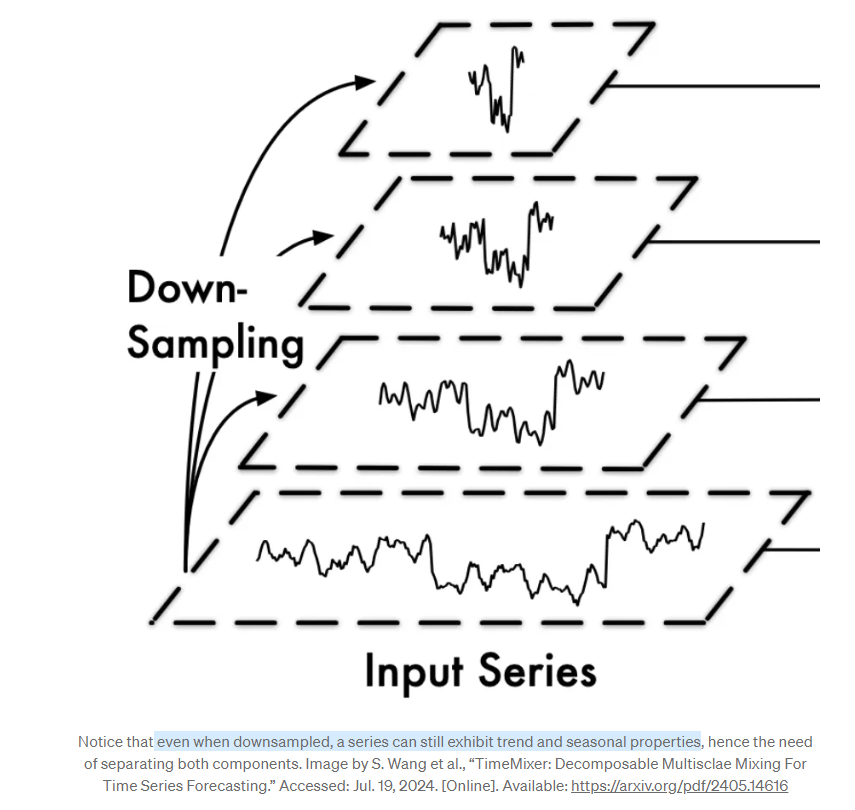

### Fourier Transform

- 샘플링된 각 시계열 데이터에 대해 푸리에 변환을 적용한다.
- 시계열 데이터에 주파수와 진폭을 얻게 된다!

 - 연간 주기는 주파수가 낮고 진폭이 크다. 즉, 주기성이 (seasonality) 크다!
 - 일간 주기는 주파수가 높고 진폭이 낮다

 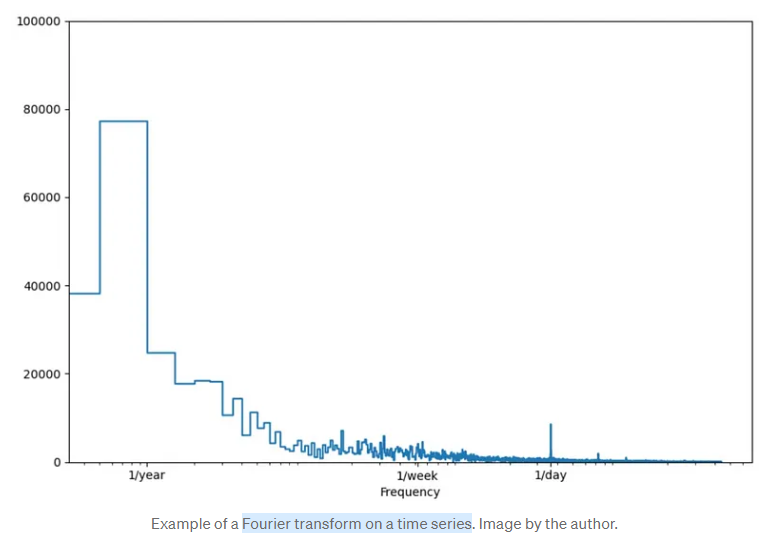



### Seasonal Mixing

- trend와 seasonality가 분리 되었다면, 이제 각각 mixing을 수행한다

- 큰 주기는 작은 주기들의 합으로 볼 수 있다 (여러 주파수가 합쳐지는 음악처럼, 푸리에 변환 참고)

 - 주간 주기는 일간 주기 7일을 합쳤다고 생각할 수 있다

 - 작은 주기를 합쳐서 큰 주기로, bottom-up mixing

 - 더 작은 시간 단위(fine-scale)의 정보가, 더 큰 주기를 포착하는 downsampling 된 시계열로 정보를 종합시킨다!

 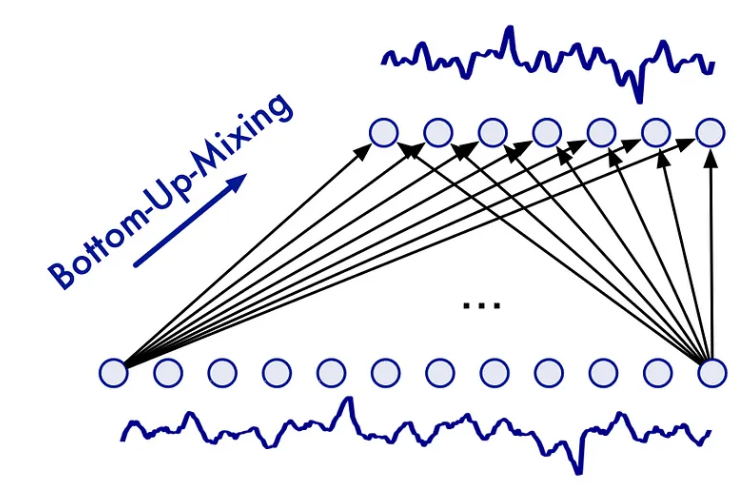



### Trend Mixing

-Trend는 반대로 top-down 방식으로 접근한다.

-장기적인 추세를 포착하는데 있어서 작은 시간 단위의 노이즈는 오히려 방해가 될 가능성이 높다.

-큰 추세를 포착해서 작은 시간 단위에 적용시킨다.

-"macro trends inform micro trends"


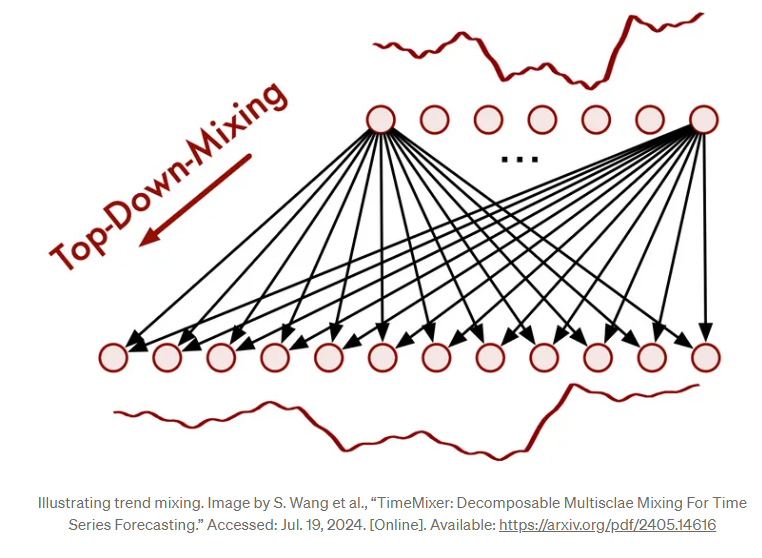

### 2. Future Multipredictor Mixing (FMM)

- PDM에서 처리된 정보는 FFW로 통과시켜서 시간 단위별로 예측을 수행한다.

- 각 예측은 서로 다른 시간 단위로 예측이 되어있다.

- 작은 시간 단위의 예측일 수록 더 많은 time step에 영향을 미치고, 거 전반적인 예측일 수록 더 적은 time step에 영향을 미치는 형태이다.

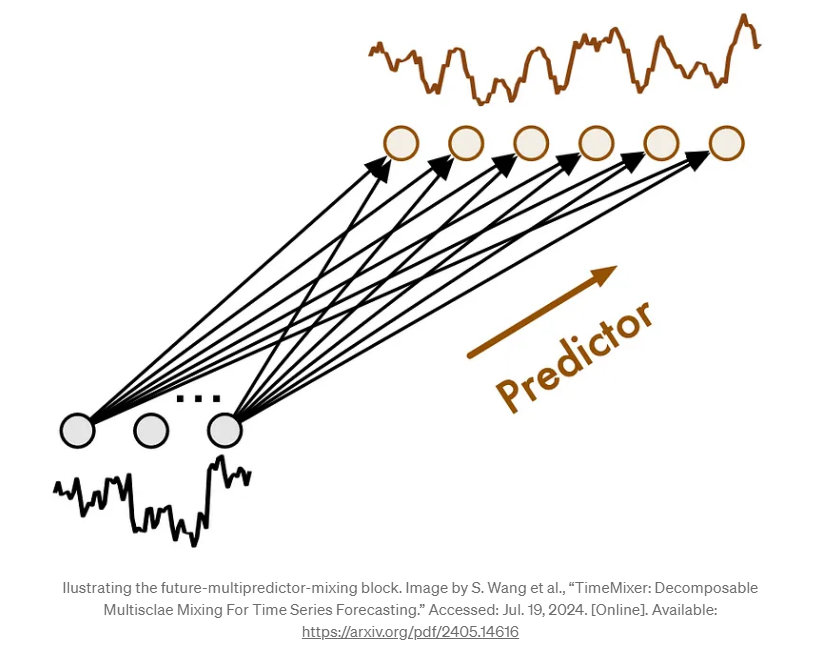

# Forecasting

- 장단기 시계열 데이터 모두 시도

- 단기 예측용 데이터: M3 dataset (https://zenodo.org/records/4656222), 실제 대회에서 사용된 데이터. 인구, 금융 등 다양한 도메인의 월별 ~ 연도별 데이터

- 장기 예측용 데이터: Electricity Transformer dataset (ETT), 중국의 송전 변압기 냉각제로 사용되는 절연유의 15분 ~ 1시간 온도 데이터.

- 주기가 긴 데이터의 경우 더 가까운 time step을 예측하고, 주기가 짧은 데이터의 경우 더 먼 time step을 예측하기 용이하다

In [ ]:
!pip install git+https://github.com/Nixtla/neuralforecast.git

  Cloning https://github.com/Nixtla/neuralforecast.git to /tmp/pip-req-build-0ur_b913
  Running command git clone --filter=blob:none --quiet https://github.com/Nixtla/neuralforecast.git /tmp/pip-req-build-0ur_b913
  Resolved https://github.com/Nixtla/neuralforecast.git to commit 957a0ccb34d17395ad1da15ef1b027f8dc2c1944
  Running command git submodule update --init --recursive -q
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using ca

# 단기 예측

In [ ]:
!pip install datasetsforecast

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 12.3 MB/s eta 0:00:00


In [ ]:
import time
import pandas as pd
import numpy as np

from datasetsforecast.m3 import M3
from datasetsforecast.long_horizon import LongHorizon

from neuralforecast.core import NeuralForecast
from neuralforecast.losses.pytorch import MAE, MSE
from neuralforecast.models import TimeMixer, PatchTST, iTransformer, NHITS, NBEATS

from utilsforecast.losses import mae, mse, smape
from utilsforecast.evaluation import evaluate

In [ ]:
def get_dataset(name):
    if name == 'M3-yearly':
        Y_df, *_ = M3.load("./data", "Yearly")
        horizon = 6
        freq = 'Y'
    elif name == 'M3-quarterly':
        Y_df, *_ = M3.load("./data", "Quarterly")
        horizon = 8
        freq = 'Q'
    elif name == 'M3-monthly':
        Y_df, *_ = M3.load("./data", "Monthly")
        horizon = 18
        freq = 'M'

    return Y_df, horizon, freq

In [ ]:
results = []

DATASETS = ['M3-yearly', 'M3-quarterly', 'M3-monthly']

for dataset in DATASETS:

    Y_df, horizon, freq = get_dataset(dataset)

    test_df = Y_df.groupby('unique_id').tail(horizon)
    train_df = Y_df.drop(test_df.index).reset_index(drop=True)

    timemixer_model = TimeMixer(input_size=2*horizon,
                                h=horizon,
                                n_series=1,
                                scaler_type='identity',
                                early_stop_patience_steps=3)
    nbeats_model = NBEATS(input_size=2*horizon,
                          h=horizon,
                          scaler_type='identity',
                          max_steps=1000,
                          early_stop_patience_steps=3)
    nhits_model = NHITS(input_size=2*horizon,
                        h=horizon,
                        scaler_type='identity',
                        max_steps=1000,
                        early_stop_patience_steps=3)

    MODELS = [timemixer_model, nbeats_model, nhits_model]
    MODEL_NAMES = ['TimeMixer', 'NBEATS', 'NHITS']

    for i, model in enumerate(MODELS):
        nf = NeuralForecast(models=[model], freq=freq)

        start = time.time()

        nf.fit(train_df, val_size=horizon)
        preds = nf.predict()

        end = time.time()
        elapsed_time = round(end - start,0)

        preds = preds.reset_index()
        test_df = pd.merge(test_df, preds, 'left', ['ds', 'unique_id'])

        evaluation = evaluate(
            test_df,
            metrics=[mae, smape],
            models=[f"{MODEL_NAMES[i]}"],
            target_col="y",
        )

        evaluation = evaluation.drop(['unique_id'], axis=1).groupby('metric').mean().reset_index()

        model_mae = evaluation[f"{MODEL_NAMES[i]}"][0]
        model_smape = evaluation[f"{MODEL_NAMES[i]}"][1]

        results.append([dataset, MODEL_NAMES[i], round(model_mae, 0), round(model_smape*100,2), elapsed_time])

results_df = pd.DataFrame(data=results, columns=['dataset', 'model', 'mae', 'smape', 'time'])
results_df.to_csv('./M3_benchmark.csv', header=True, index=False)

100%|██████████| 1.76M/1.76M [00:00<00:00, 36.6MiB/s]
INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
   | Name              | Type                 | Params | Mode 
--------------------------------------------------------------------
0  | loss              | MAE                  | 0      | train
1  | padder            | ConstantPad1d        | 0      | train
2  | scaler            | TemporalNorm         | 0      | train
3  | pdm_blocks        | ModuleList           | 18.6 K | train
4  | preprocess        | SeriesDe

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1000` reached.
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:209: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 2.4 M  | train
----------------------------------------

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:209: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 2.4 M  | train
----------------------------------------

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:209: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
   | Name              | Type                 | Params | Mode 
--------------------------------------------------------------------
0  | loss              | MAE                  | 0      | trai

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1000` reached.
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:209: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 2.4 M  | train
----------------------------------------

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1000` reached.
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:209: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 2.4 M  | train
----------------------------------------

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1000` reached.
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:209: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
   | Name              | Type                 | Params | Mode 
--------------------------------------------------------------------
0  | loss              | MAE                  | 0      | trai

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1000` reached.
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:209: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 2.5 M  | train
----------------------------------------

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:209: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 2.5 M  | train
----------------------------------------

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1000` reached.
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:209: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


# 장기 예측

In [ ]:
def load_data(name):
    if name == 'Ettm1':
        Y_df, *_ = LongHorizon.load(directory='./', group='ETTm1')
        Y_df['ds'] = pd.to_datetime(Y_df['ds'])
        freq = '15T'
        h = 96
        val_size = 11520
        test_size = 11520
    elif name == 'Ettm2':
        Y_df, *_ = LongHorizon.load(directory='./', group='ETTm2')
        Y_df['ds'] = pd.to_datetime(Y_df['ds'])
        freq = '15T'
        h = 96
        val_size = 11520
        test_size = 11520

    return Y_df, h, val_size, test_size, freq

In [ ]:
DATASETS = ['Ettm1', 'Ettm2']

for dataset in DATASETS:

    Y_df, horizon, val_size, test_size, freq = load_data(dataset)

    timemixer_model = TimeMixer(input_size=horizon,
                                h=horizon,
                                n_series=7,  # Including n_series as required by TimeMixer
                                e_layers=2,
                                d_model=16,
                                d_ff=32,
                                down_sampling_layers=3,
                                down_sampling_window=2,
                                learning_rate=0.01,
                                scaler_type='robust',
                                batch_size=16,
                                early_stop_patience_steps=5)

    nhits_model = NHITS(input_size=2*horizon,
                        h=horizon,
                        n_series=7,  # Including n_series as required by NHITS
                        e_layers=2,
                        d_model=16,
                        d_ff=32,
                        down_sampling_layers=3,
                        down_sampling_window=2,
                        learning_rate=0.01,
                        scaler_type='robust',
                        batch_size=16,
                        early_stop_patience_steps=5)

    patchtst_model = PatchTST(input_size=horizon,
                              h=horizon,
                              encoder_layers=3,
                              n_heads=4,
                              hidden_size=16,
                              dropout=0.3,
                              patch_len=16,
                              stride=8,
                              scaler_type='identity',
                              max_steps=1000,
                              early_stop_patience_steps=5)

    iTransformer_model = iTransformer(input_size=horizon,
                                      h=horizon,
                                      n_series=7,  # Including n_series as required by iTransformer
                                      e_layers=2,
                                      hidden_size=128,
                                      d_ff=128,
                                      scaler_type='identity',
                                      max_steps=1000,
                                      early_stop_patience_steps=3)

    models = [timemixer_model, nhits_model, patchtst_model, iTransformer_model]

    nf = NeuralForecast(models=models, freq=freq)

    nf_preds = nf.cross_validation(df=Y_df, val_size=val_size, test_size=test_size, n_windows=None)
    nf_preds = nf_preds.reset_index()

    evaluation = evaluate(df=nf_preds, metrics=[mae, mse], models=['TimeMixer', 'NHiTS', 'PatchTST', 'iTransformer'])
    evaluation.to_csv(f'{dataset}_results.csv', index=False, header=True)


INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
   | Name              | Type                 | Params | Mode 
--------------------------------------------------------------------
0  | loss              | MAE                  | 0      | train
1  | padder            | ConstantPad1d        | 0      | train
2  | scaler            | TemporalNorm         | 0      | train
3  | pdm_blocks        | ModuleList           | 59.8 K | train
4  | preprocess        | SeriesDecom

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

TypeError: Trainer.__init__() got an unexpected keyword argument 'n_series'